# Proyecto Análisis Liga MX (2012-2023)

Integrantes del equipo 10
*   Antonio Torres Flores
-------------------------------------------------------------------------------

Anteriormente el deporte solo se dejaba a los jugadores y entrenadores, pero ahora con la gran cantidad de dispositivos y más gente involucrada en el mismo se tiene gran cantidad de información para analizar y mejorar el rendimiento tanto de los deportistas como el equipo.


Importamos algunas librerias importantes para comenzar como:

Pandas - Procesamiento, manipulacion y transformación de datos
Seaborn - Visualizacion de datos
Numpy - Funciones matematicas, algebra linear
Matplotlib - visualización de datos
Skew y Kurtosis de scipy.stats - para obtener curtosis y asimetria

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis
# import scikitplot as skplt
# from sklearn.prprocessing import StandardSacaler
# ----------------------------------------------------------------------------
from sklearn import tree as treeClassifier
from sklearn.ensemble import RandomForestClassifier as forest
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
# ---------------------------------------------------------------------------
from sklearn.datasets import make_classification 
#----------------------------------------------------------------------------
from sklearn.metrics import (r2_score, roc_auc_score,
                            classification_report,
                            roc_curve, auc)

In [2]:
df_raw = pd.read_csv('liga_mx_2023.csv')

In [3]:
df_raw.head()

,Temporada,Posicion,Nombre,Asistencia,Liguilla,Campeon,Edad,PJ,PG,PE,...,Puntos,Goles,Asistencias,Penales,Penales_fallados,T_Amarillas,T_Rojas,Salvadas,Disparos_Puerta,Faltas
0,2012-2013,1,America,28125,SI,CAMPEON,26.4,34,17,12,...,63,58,39,5,7,77,8,93,207,320
1,2012-2013,2,Morelia,16056,SI,NO,28.0,34,14,15,...,57,48,38,5,5,86,10,109,176,338
2,2012-2013,3,UANL,41000,SI,NO,27.3,34,15,11,...,56,51,36,4,6,55,0,94,175,280
3,2012-2013,4,Cruz Azul,23944,SI,NO,28.7,34,14,13,...,55,56,38,4,5,84,6,123,221,431
4,2012-2013,5,Tijuana,18300,SI,CAMPEON,28.4,34,15,10,...,55,41,28,3,3,104,13,109,162,365


In [4]:
#Revisamos el dataset y tipo de datos
df = df_raw
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Temporada         199 non-null    object 
 1   Posicion          199 non-null    int64  
 2   Nombre            199 non-null    object 
 3   Asistencia        199 non-null    int64  
 4   Liguilla          199 non-null    object 
 5   Campeon           199 non-null    object 
 6   Edad              199 non-null    float64
 7   PJ                199 non-null    int64  
 8   PG                199 non-null    int64  
 9   PE                199 non-null    int64  
 10  PP                199 non-null    int64  
 11  GF                199 non-null    int64  
 12  GC                199 non-null    int64  
 13  DG                199 non-null    int64  
 14  Puntos            199 non-null    int64  
 15  Goles             199 non-null    int64  
 16  Asistencias       199 non-null    int64  
 1

Descripción de las columnas

 - **Temporada**. Temporada jugada
 - **Posicion**. Posición final en que terminó el equipo
 - **Nombre**. Nombre del equipo
 - **Asistencia**. Asistencia promedio en partidos Locales
 - **Liguilla**. 1 - si clasificó a liguilla | 0 - No clasificó a la liguilla
 - **Campeon**. 1 - Fue campeón | 0 - No Fue campeón
 - **Edad**. Edad promedio del equipo
 - **PJ**. Partidos jugados
 - **PG**. Partidos Ganados
 - **PE**. Partidos Empatados
 - **PP**. Partidos Perdidos
 - **GF**. Goles a favor
 - **GC**. Goles en contra
 - **DG**. Diferencia de goles
 - **Puntos**. Puntos obtenidos en la temporada
 - **Goles**. Goles realizados
 - **Asistencias**. Asistencias realizadas
 - **Penales**. Penales obtenidos
 - **Penales_fallados**. Penales fallados en la temporada
 - **T_Amarillas**. Tarjetas amarillas (amostaciones)
 - **T_Rojas**. Tarjetas Rojas (expulsiones)
 - **Salvadas**. Tiros atajados por el portero
 - **Disparos_Puerta**. Disparos a puerta contraria
 - **Faltas**. Faltas realizadas


In [5]:
df.Posicion = df.Posicion.astype(str)

In [6]:
# Revisamos que no tengamos datos vacíos
df.isna().sum()

Temporada           0
Posicion            0
Nombre              0
Asistencia          0
Liguilla            0
Campeon             0
Edad                0
PJ                  0
PG                  0
PE                  0
PP                  0
GF                  0
GC                  0
DG                  0
Puntos              0
Goles               0
Asistencias         0
Penales             0
Penales_fallados    0
T_Amarillas         0
T_Rojas             0
Salvadas            0
Disparos_Puerta     0
Faltas              0
dtype: int64

In [7]:
df.describe()

,Asistencia,Edad,PJ,PG,PE,PP,GF,GC,DG,Puntos,Goles,Asistencias,Penales,Penales_fallados,T_Amarillas,T_Rojas,Salvadas,Disparos_Puerta,Faltas
count,199.00000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,20214.00000,27.756281,33.376884,12.040201,9.296482,12.040201,43.552764,43.552764,0.000000,45.417085,42.331658,28.989950,4.326633,5.628141,38.984925,3.316583,102.537688,146.904523,442.557789
std,10968.27061,1.172775,2.043385,3.822896,2.700082,3.894880,9.780726,9.434837,15.110703,11.196225,9.767011,8.269446,2.185546,2.445861,36.762475,3.291445,16.850421,29.005850,65.564876
min,0.00000,24.800000,18.000000,1.000000,3.000000,4.000000,11.000000,24.000000,-50.000000,8.000000,11.000000,8.000000,0.000000,0.000000,0.000000,0.000000,58.000000,43.000000,217.000000
25%,13671.50000,26.950000,34.000000,9.000000,7.000000,9.000000,37.000000,36.000000,-11.000000,37.000000,35.000000,22.500000,3.000000,4.000000,0.000000,0.000000,92.000000,128.500000,403.500000
50%,20340.00000,27.900000,34.000000,12.000000,9.000000,12.000000,43.000000,43.000000,0.000000,46.000000,42.000000,28.000000,4.000000,5.000000,53.000000,3.000000,101.000000,145.000000,441.000000
75%,25749.00000,28.600000,34.000000,15.000000,11.000000,15.000000,49.000000,50.000000,11.000000,52.000000,48.000000,35.000000,5.000000,7.000000,73.000000,6.000000,114.000000,163.500000,483.000000
max,50556.00000,30.500000,34.000000,23.000000,16.000000,24.000000,74.000000,74.000000,37.000000,75.000000,73.000000,53.000000,11.000000,12.000000,104.000000,13.000000,149.000000,227.000000,633.000000


In [19]:
df_resume = df[['Temporada','Posicion','Nombre','Asistencia','Liguilla','Campeon','Edad','PJ','PG','PE','PP','GF','GC','Puntos','Goles']]

In [20]:
df_resume.head()

,Temporada,Posicion,Nombre,Asistencia,Liguilla,Campeon,Edad,PJ,PG,PE,PP,GF,GC,Puntos,Goles
0,2012-2013,1,America,28125,SI,CAMPEON,26.4,34,17,12,5,58,30,63,58
1,2012-2013,2,Morelia,16056,SI,NO,28.0,34,14,15,5,50,34,57,48
2,2012-2013,3,UANL,41000,SI,NO,27.3,34,15,11,8,53,32,56,51
3,2012-2013,4,Cruz Azul,23944,SI,NO,28.7,34,14,13,7,57,35,55,56
4,2012-2013,5,Tijuana,18300,SI,CAMPEON,28.4,34,15,10,9,42,36,55,41


## 2. Data Visualization

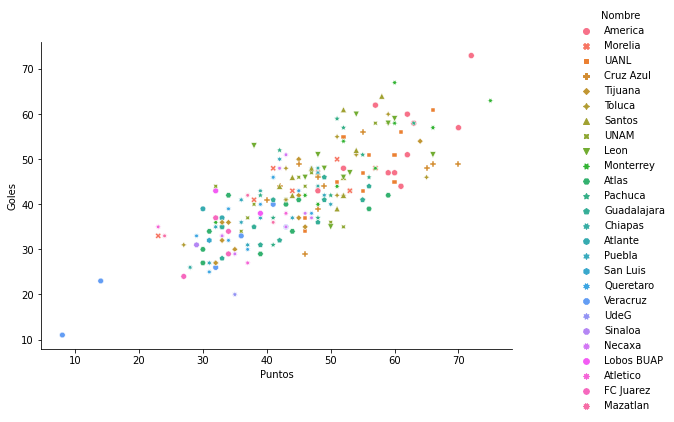

In [21]:
g=sns.relplot(x='Puntos',y='Goles',data=df_resume,hue='Nombre',style='Nombre')
g.fig.set_size_inches(10,5)
plt.show()

In [39]:
crosstab = pd.crosstab(
    df['Nombre'], 
    df['Temporada'], 
    values = df['Puntos'],
    aggfunc = 'sum'
).round(0).fillna(0)

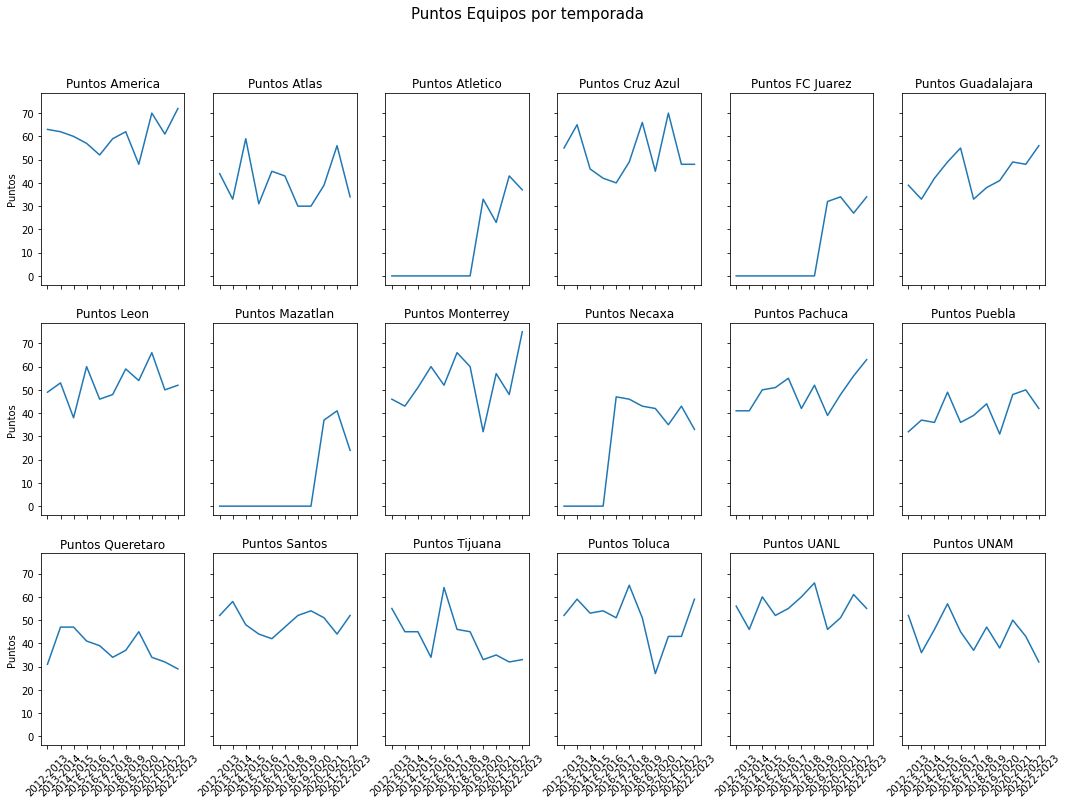

In [96]:
fig, axes = plt.subplots(3, 6, figsize=(18, 12), sharex=True, sharey=True)

sns.lineplot(x = crosstab.columns, y = crosstab.loc['America'], ax=axes[0, 0])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Atlas'], ax=axes[0, 1])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Atletico'], ax=axes[0, 2])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Cruz Azul'], ax=axes[0, 3])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['FC Juarez'], ax=axes[0, 4])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Guadalajara'], ax=axes[0, 5])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Leon'], ax=axes[1, 0])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Mazatlan'], ax=axes[1, 1])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Monterrey'], ax=axes[1, 2])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Necaxa'], ax=axes[1, 3])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Pachuca'], ax=axes[1, 4])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Puebla'], ax=axes[1, 5])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Queretaro'], ax=axes[2, 0])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Santos'], ax=axes[2, 1])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Tijuana'], ax=axes[2, 2])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['Toluca'], ax=axes[2, 3])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['UANL'], ax=axes[2, 4])
sns.lineplot(x = crosstab.columns, y = crosstab.loc['UNAM'], ax=axes[2, 5])

axes[0, 0].set(xlabel='', ylabel='Puntos', title='Puntos America')
axes[0, 1].set(xlabel='', ylabel='', title='Puntos Atlas')
axes[0, 2].set(xlabel='', ylabel='', title='Puntos Atletico')
axes[0, 3].set(xlabel='', ylabel='', title='Puntos Cruz Azul')
axes[0, 4].set(xlabel='', ylabel='', title='Puntos FC Juarez')
axes[0, 5].set(xlabel='', ylabel='', title='Puntos Guadalajara')
axes[1, 0].set(xlabel='', ylabel='Puntos', title='Puntos Leon')
axes[1, 1].set(xlabel='', ylabel='', title='Puntos Mazatlan')
axes[1, 2].set(xlabel='', ylabel='', title='Puntos Monterrey')
axes[1, 3].set(xlabel='', ylabel='', title='Puntos Necaxa')
axes[1, 4].set(xlabel='', ylabel='', title='Puntos Pachuca')
axes[1, 5].set(xlabel='', ylabel='', title='Puntos Puebla')
axes[2, 0].set(xlabel='', ylabel='Puntos', title='Puntos Queretaro')
axes[2, 1].set(xlabel='', ylabel='', title='Puntos Santos')
axes[2, 2].set(xlabel='', ylabel='', title='Puntos Tijuana')
axes[2, 3].set(xlabel='', ylabel='', title='Puntos Toluca')
axes[2, 4].set(xlabel='', ylabel='', title='Puntos UANL')
axes[2, 5].set(xlabel='', ylabel='', title='Puntos UNAM')

#plt.xticks(rotation=45)
#ax.set_xticklabels(ax.get_xticks(), rotation = 45)
axes[2, 0].tick_params(axis='x', rotation=45)
axes[2, 1].tick_params(axis='x', rotation=45)
axes[2, 2].tick_params(axis='x', rotation=45)
axes[2, 3].tick_params(axis='x', rotation=45)
axes[2, 4].tick_params(axis='x', rotation=45)
axes[2, 5].tick_params(axis='x', rotation=45)

fig.suptitle('Puntos Equipos por temporada', fontsize=15);


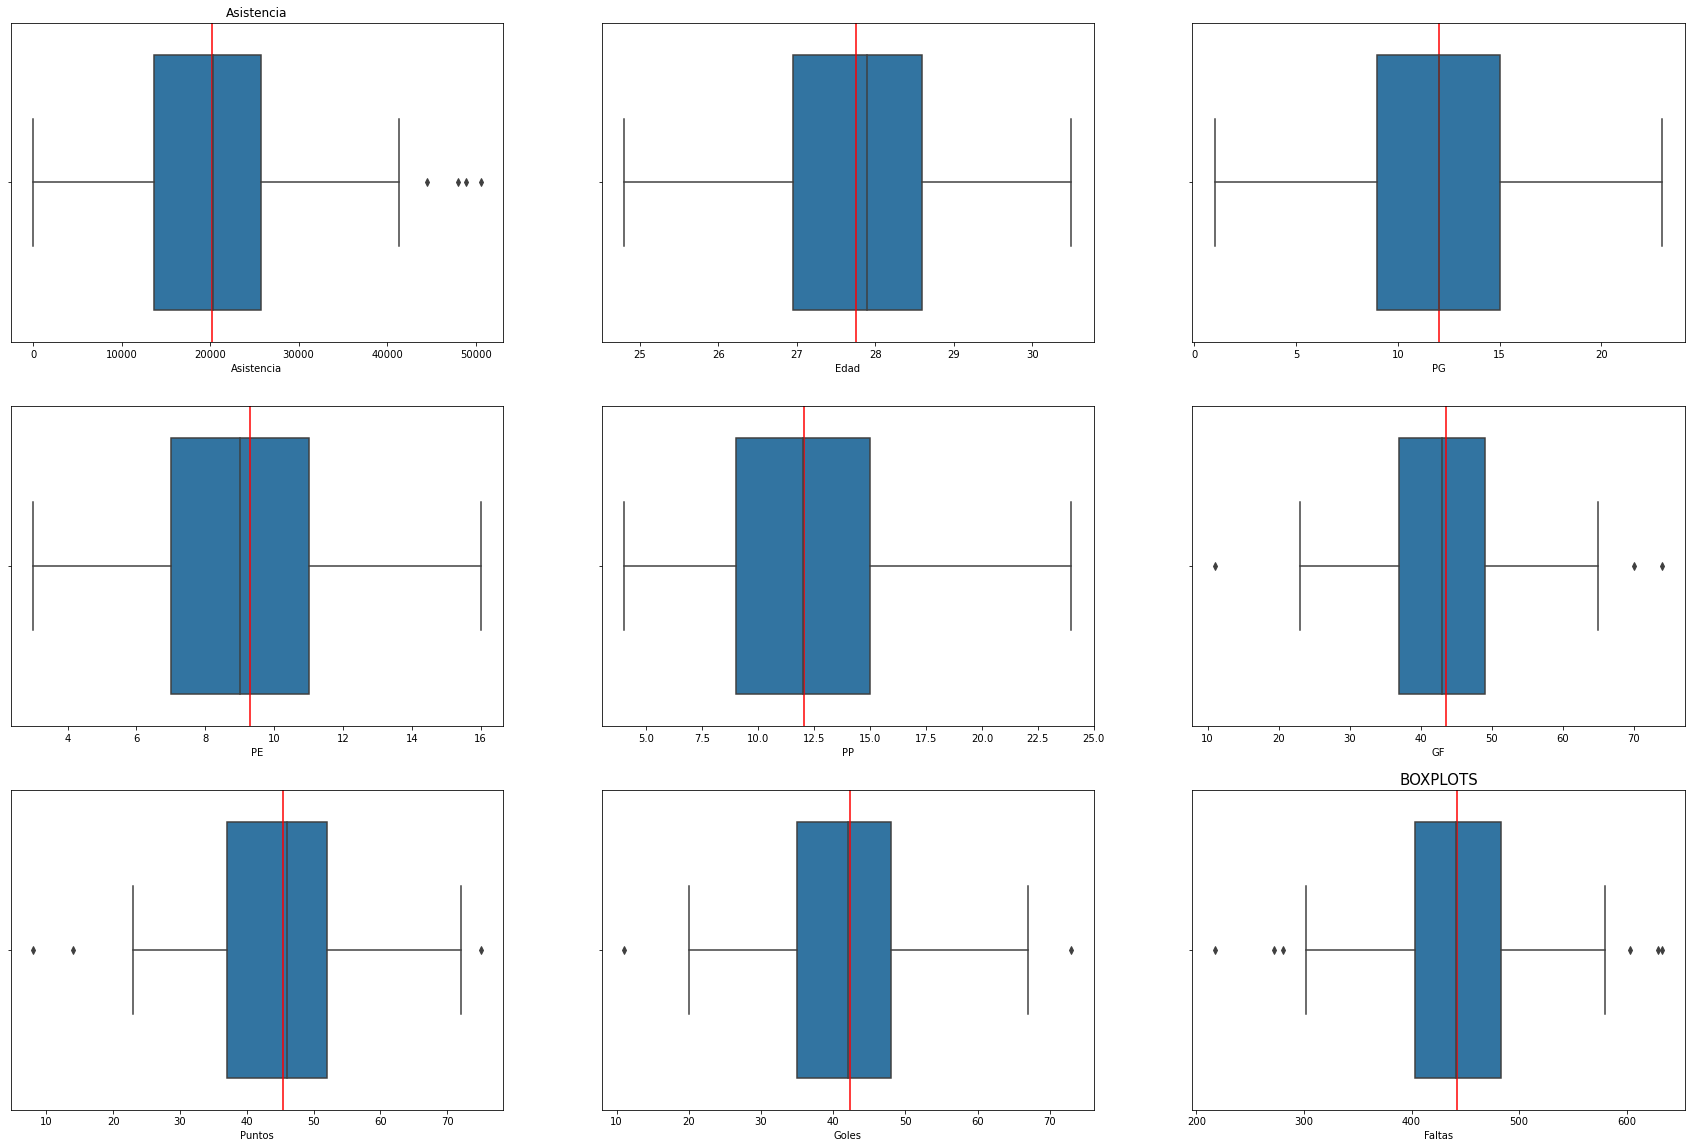

In [105]:
plt.figure(figsize=(30,20))

plt.subplot(3,3,1)
sns.boxplot(x=df['Asistencia']);
plt.axvline(df['Asistencia'].mean(), c = 'r');

plt.subplot(3,3,2)
sns.boxplot(x=df['Edad']);
plt.axvline(df['Edad'].mean(), c = 'r');

plt.subplot(3,3,3)
sns.boxplot(x=df['PG']);
plt.axvline(df['PG'].mean(), c = 'r');

plt.subplot(3,3,4)
sns.boxplot(x=df['PE']);
plt.axvline(df['PE'].mean(), c = 'r');

plt.subplot(3,3,5)
sns.boxplot(x=df['PP']);
plt.axvline(df['PP'].mean(), c = 'r');

plt.subplot(3,3,6)
sns.boxplot(x=df['GF']);
plt.axvline(df['GF'].mean(), c = 'r');

plt.subplot(3,3,7)
sns.boxplot(x=df['Puntos']);
plt.axvline(df['Puntos'].mean(), c = 'r');

plt.subplot(3,3,8)
sns.boxplot(x=df['Goles']);
plt.axvline(df['Goles'].mean(), c = 'r');


plt.subplot(3,3,9)
sns.boxplot(x=df['Faltas']);
plt.axvline(df['Faltas'].mean(), c = 'r');

plt.title('BOXPLOTS', fontsize=15);

### Análisis de boxplot de nuestros datos

*   Edad: podemos ver que nuestros datos parecieran tener una distribución normal.
*   Experiencia_Laboral: Podemos ver que los datos también tiene una distribución parecida a la normal
*   Ingresos: Observamos que la distribución de los datos tiene un sesgo hacia la derecha con un poco outliers que se encuentran después del rango intercuartílico
*   Dependientes: Observamos que el 50% se encuentra entre 1 y 3 dependientes y la media se encuentra en 2.1 dependientes
*   Gastos: vemos que el 50% de nuestros datos se encuentran entre 8 y 31 mil dolares y tenemos unos cuantos datos atípicos
*   Educación: Vemos que la totalidad de nuestros datos se encuentre entre las tres categorías de datos 1, 2, 3
*   Valor de la Hipoteca: el 50 % de los datos se encuentra entre 0 y 101.0. En esta columna si vemos muchos mas datos atípicos
*   Crédito Personal: este dato es categórico al igual que Educación, pero en este vemos que la mayoría de los datos se encuentran en 0 y muy pocos se encuentran en 1 lo que indica que tenemos muy pocas personas aceptaron la promoción
*   Activo_Financiero: Este pareciera muy parecido al caso de cédito personal la mayoria de los clietnes no disponen de una cuenta de Activos Financieros
*   Banca Onlie: este dato también es categórico, pero vemos que los datos se encuentra más distribuidos entre los que usan la banca online y los que no la utilizan
*   Tarjetas_de_credito: por último, tenemos este otro dato categórico y observamos que también se distribuye más o menos de manera equitativa entre las personas que tiene tarjetas de crédito de otra institución bancaria y los que no 

## TABLAS DE FRECUENCIAS

In [110]:
puntos = df['Puntos']
segmento_puntos = pd.cut(puntos,10)
df['Puntos'].groupby(segmento_puntos).count()


Puntos
(7.933, 14.7]     2
(14.7, 21.4]      0
(21.4, 28.1]      6
(28.1, 34.8]     32
(34.8, 41.5]     32
(41.5, 48.2]     52
(48.2, 54.9]     32
(54.9, 61.6]     28
(61.6, 68.3]     11
(68.3, 75.0]      4
Name: Puntos, dtype: int64

Se observa que hay gran cantidad de datos en el rango de 28 a 61 puntos por temporada

In [112]:
ganados = df['PG']
segmento_pg = pd.cut(ganados,6)
df['PG'].groupby(segmento_pg).count()


PG
(0.978, 4.667]       2
(4.667, 8.333]      34
(8.333, 12.0]       80
(12.0, 15.667]      48
(15.667, 19.333]    30
(19.333, 23.0]       5
Name: PG, dtype: int64

Podemos notar que la mayoria de los datos está en el rango de 8 a 19 partidos ganados por temporada

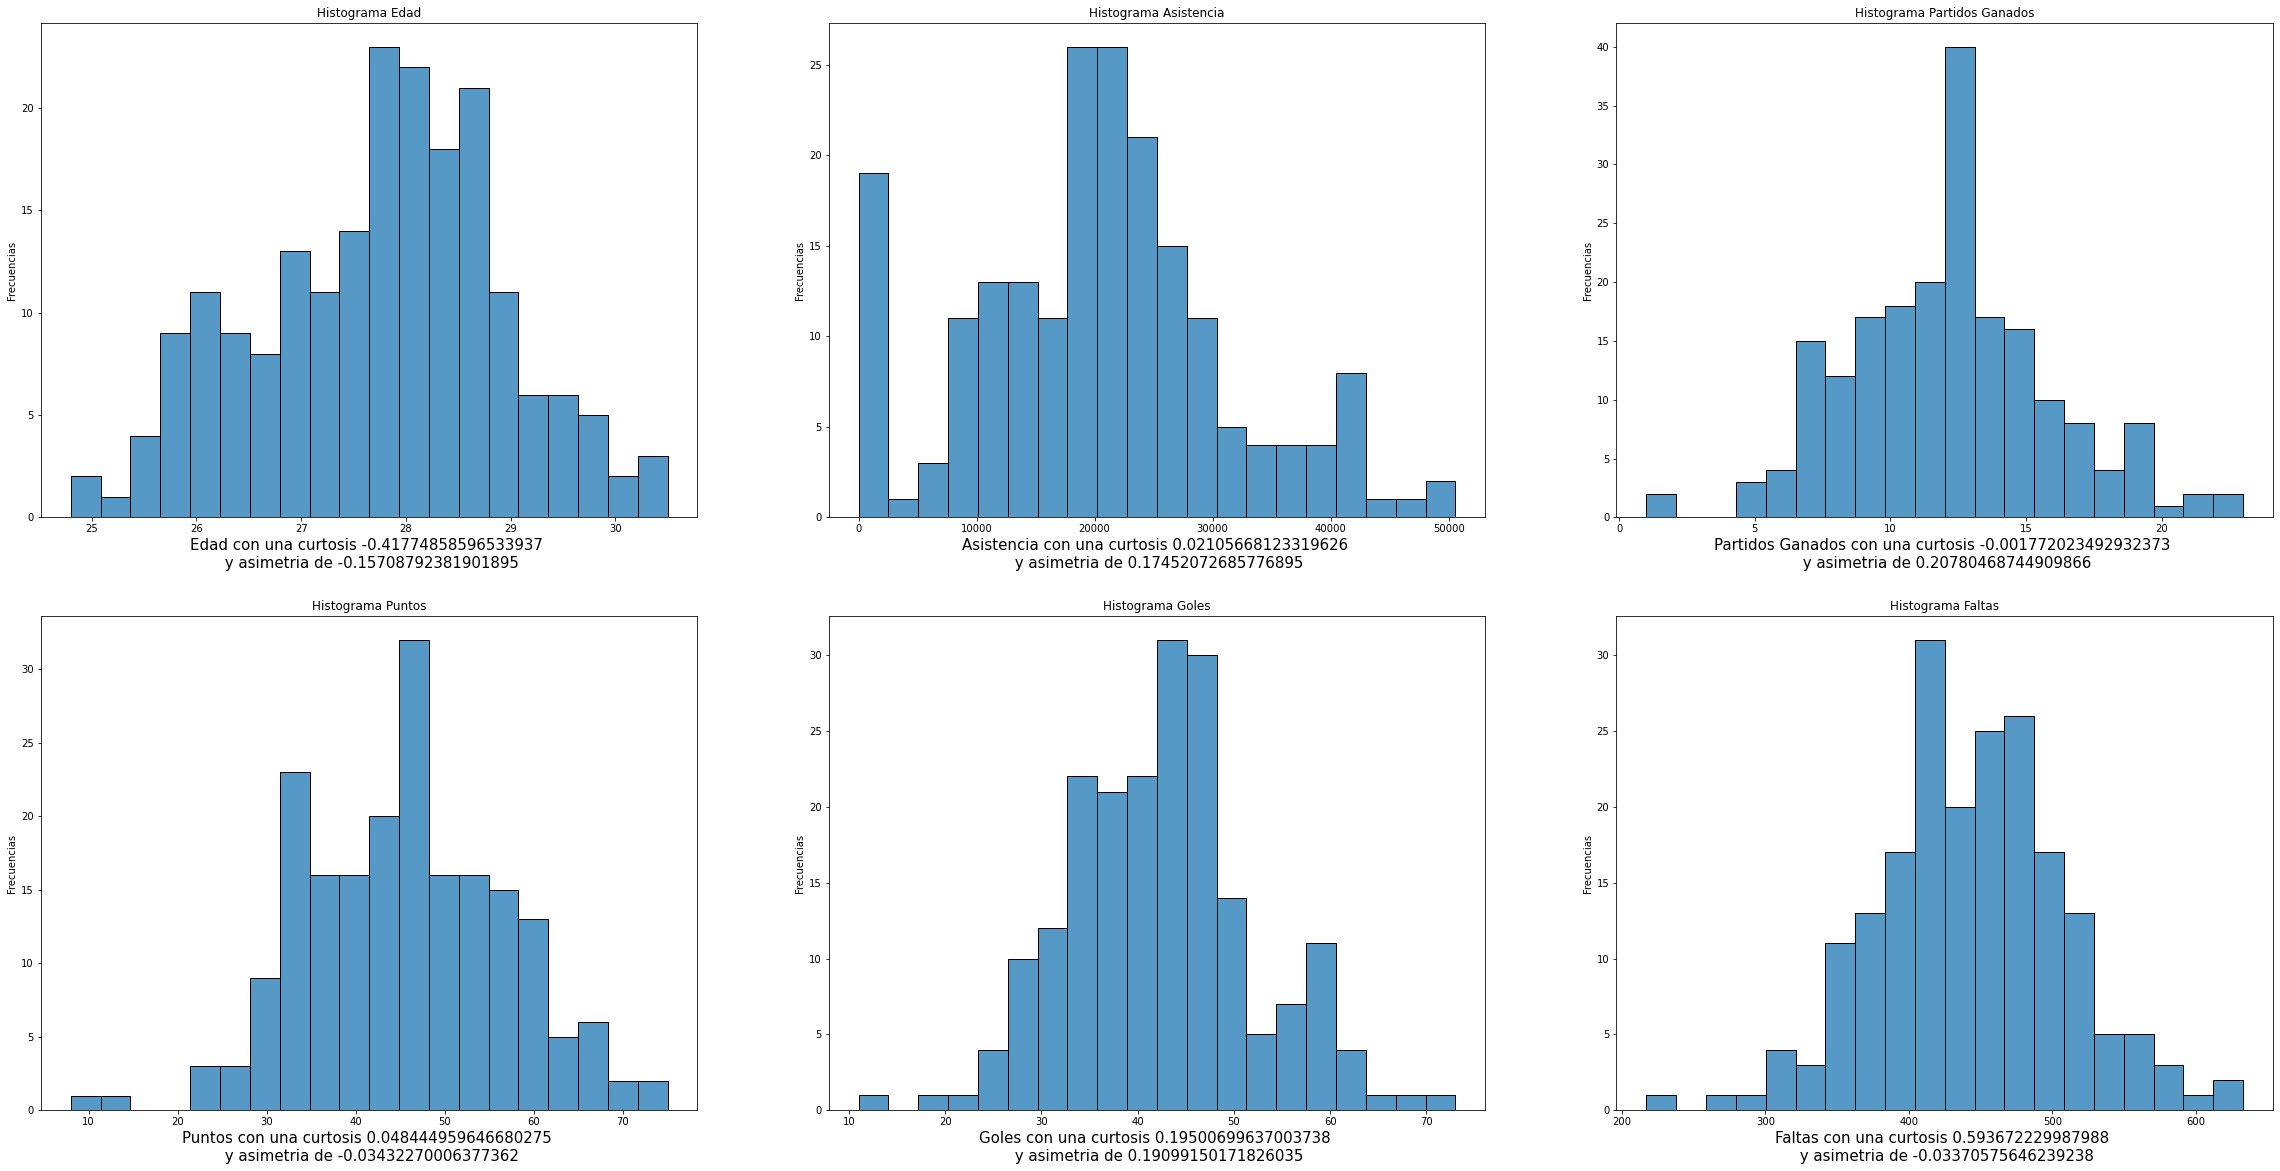

In [115]:
plt.figure(figsize=(40,20))

plt.subplot(2,3,1)
axe = sns.histplot(df['Edad'], bins = 20)
axe.set(title = 'Histograma Edad', ylabel = 'Frecuencias' );
axe.set_xlabel(f'Edad con una curtosis {kurtosis(df["Edad"])} \n y asimetria de {skew(df["Edad"])}', fontsize = 15);

plt.subplot(2,3,2)
axel = sns.histplot(df['Asistencia'], bins = 20)
axel.set(title = 'Histograma Asistencia', ylabel = 'Frecuencias');
axel.set_xlabel(f'Asistencia con una curtosis {kurtosis(df["Asistencia"])} \n y asimetria de {skew(df["Asistencia"])}', fontsize = 15);

plt.subplot(2,3,3)
axi = sns.histplot(df['PG'], bins = 20)
axi.set(title = 'Histograma Partidos Ganados', ylabel = 'Frecuencias');
axi.set_xlabel(f'Partidos Ganados con una curtosis {kurtosis(df["PG"])} \n y asimetria de {skew(df["PG"])}', fontsize = 15);

plt.subplot(2,3,4)
axdp = sns.histplot(df['Puntos'], bins = 20)
axdp.set(title = 'Histograma Puntos', ylabel = 'Frecuencias');
axdp.set_xlabel(f'Puntos con una curtosis {kurtosis(df["Puntos"])} \n y asimetria de {skew(df["Puntos"])}', fontsize = 15);

plt.subplot(2,3,5)
axg = sns.histplot(df['Goles'], bins = 20)
axg.set(title = 'Histograma Goles', ylabel = 'Frecuencias');
axg.set_xlabel(f'Goles con una curtosis {kurtosis(df["Goles"])} \n y asimetria de {skew(df["Goles"])}', fontsize = 15);

plt.subplot(2,3,6)
axed = sns.histplot(df['Faltas'], bins = 20)
axed.set(title = 'Histograma Faltas', ylabel = 'Frecuencias');
axed.set_xlabel(f'Faltas con una curtosis {kurtosis(df["Faltas"])} \n y asimetria de {skew(df["Faltas"])}', fontsize = 15);

In [122]:
tips = sns.load_dataset("tips")

In [123]:
tips

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an 

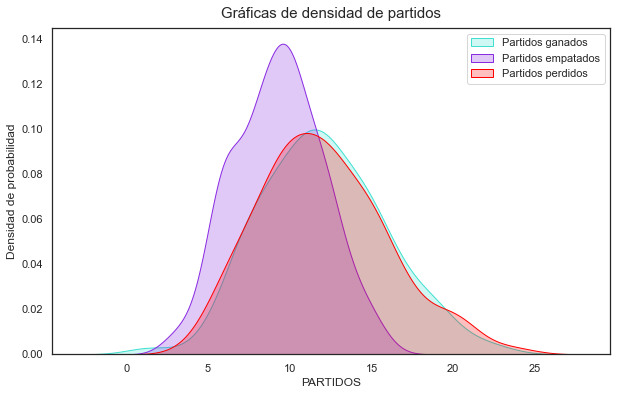

In [127]:
#4. Gráficas de densidad
sns.set(style='white')
plt.figure(figsize=(10, 6))

ganados = df['PG']
empates = df['PE']
perdidos = df['PP']

ax = sns.distplot(ganados, hist = False, kde_kws = {'shade': True}, color='turquoise', label = "Partidos ganados")
ax = sns.distplot(empates, hist = False, kde_kws = {'shade': True}, color='blueviolet', label = 'Partidos empatados')
ax = sns.distplot(perdidos, hist = False, kde_kws = {'shade': True}, color='red', label = 'Partidos perdidos')
#ax = sns.kdeplot(data = df.loc[(df['Educación']== 3)], x = 'Gastos', color='red', shade=True, Label='Maestria o Doctorado')

ax.set_title('Gráficas de densidad de partidos', fontsize = 15, pad = 10)
ax.set_ylabel('Densidad de probabilidad', size = 12)
ax.set_xlabel('PARTIDOS', size = 12)
ax.legend(loc=0);

<AxesSubplot:xlabel='Goles', ylabel='Density'>

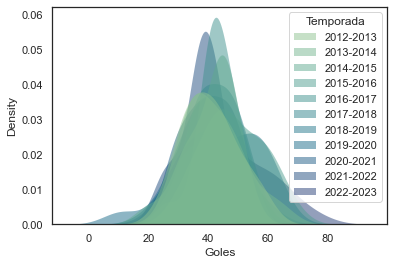

In [132]:
sns.kdeplot(
   data=df, x="Goles", hue="Temporada",
   fill=True, common_norm=False, palette="crest",
   alpha=.5, linewidth=0,
)

<AxesSubplot:xlabel='PG', ylabel='Goles'>

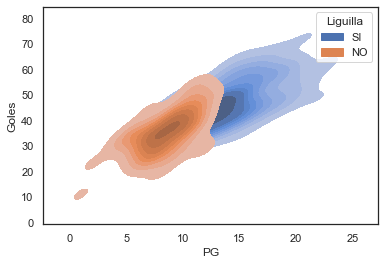

In [129]:
sns.kdeplot(
    data=df, x="PG", y="Goles", hue="Liguilla", fill=True,
)

In [ ]:
fig = plt.figure(figsize = (30,15), dpi = 80)

plt.subplot(2,4,1)
densidad_e = sns.kdeplot(data = df.loc[(df['Banca_Online']== 0)], x = 'Edad', color='turquoise', shade=True, Label='No usa banca Online')
sns.kdeplot(data = df.loc[(df['Banca_Online']== 1)], x = 'Edad', color='blueviolet', shade=True, Label='Usa banca Online')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Edad')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,2)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Edad', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Edad', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Edad')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,3)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Ingresos', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Ingresos', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Ingresos')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,4)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Cuenta_de_Ahorros', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Cuenta_de_Ahorros', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Cuenta de Ahorros')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,5)
densidad_e = sns.kdeplot(data = df.loc[(df['Cuenta_de_Ahorros']== 0)], x = 'Ingresos', color='turquoise', shade=True, Label='No tiene cuenta ahorros')
sns.kdeplot(data = df.loc[(df['Cuenta_de_Ahorros']== 1)], x = 'Ingresos', color='blueviolet', shade=True, Label='tiene cuenta ahorros')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Ingresos')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,6)
densidad_e = sns.kdeplot(data = df.loc[(df['Credito_Personal']== 0)], x = 'Gastos', color='turquoise', shade=True, Label='No Acepto Credito Personal')
sns.kdeplot(data = df.loc[(df['Credito_Personal']== 1)], x = 'Gastos', color='blueviolet', shade=True, Label='Acepto Credito Personal')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Gastos')
plt.ylabel('Probabilidad de densidad');

plt.subplot(2,4,7)
densidad_e = sns.kdeplot(data = df.loc[(df['Educación']== 1)], x = 'Gastos', color='turquoise', shade=True, Label='No se graduo')
sns.kdeplot(data = df.loc[(df['Educación']== 2)], x = 'Gastos', color='blueviolet', shade=True, Label='Graduado')
sns.kdeplot(data = df.loc[(df['Educación']== 3)], x = 'Gastos', color='red', shade=True, Label='Maestria o Doctorado')
densidad_e.legend(loc = 'upper right');
plt.xlabel('Gastos')
plt.ylabel('Probabilidad de densidad');

## Violinplots

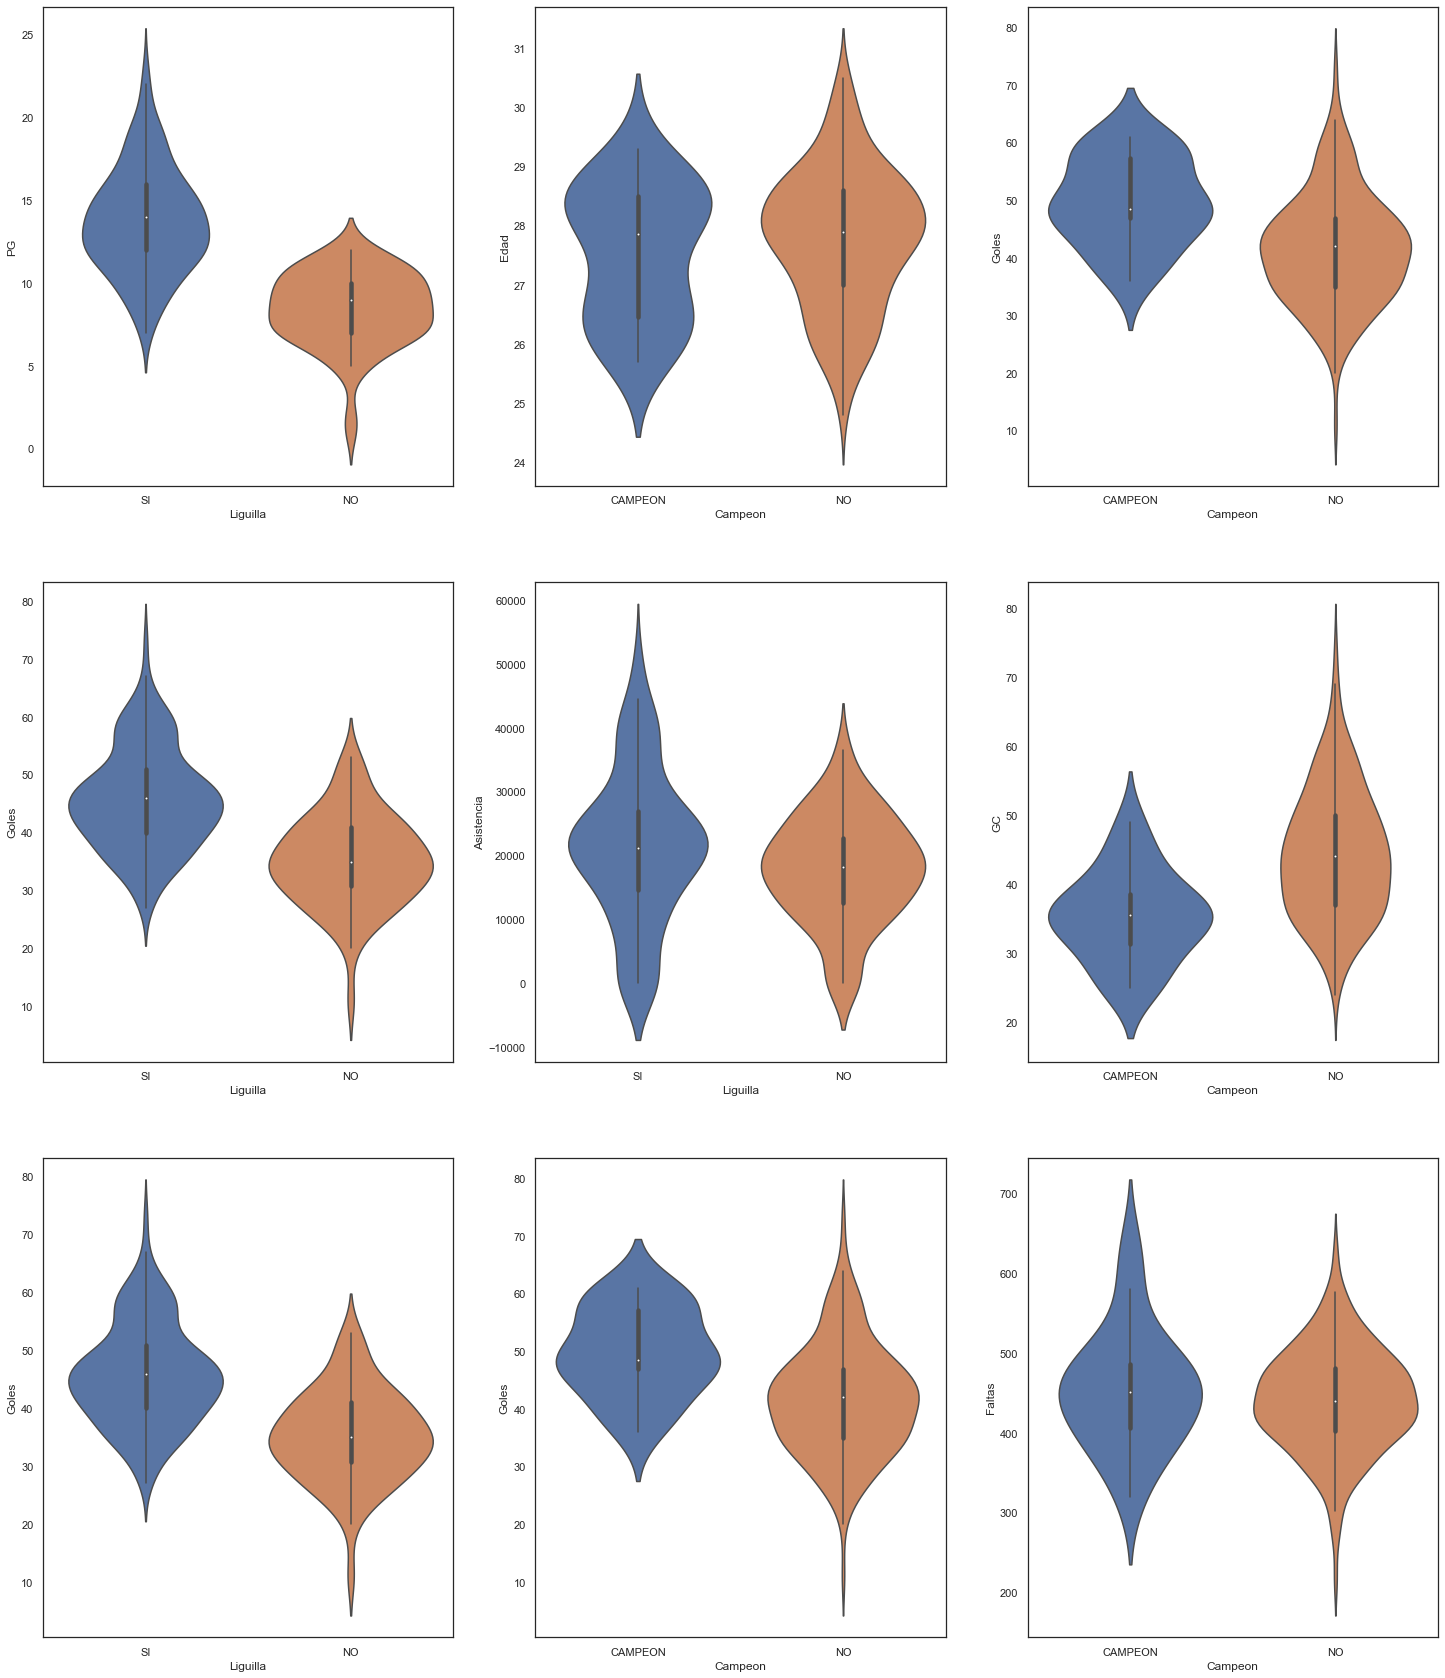

In [135]:
plt.figure(figsize=(25,30))

plt.subplot(3, 3, 1)
sns.violinplot(y = df['PG'], x = df['Liguilla']);

plt.subplot(3, 3, 2)
sns.violinplot(y = df['Edad'], x = df['Campeon']);

plt.subplot(3, 3, 3)
sns.violinplot(y = df['Goles'], x = df['Campeon']);

plt.subplot(3, 3, 4)
sns.violinplot(y = df['Goles'], x = df['Liguilla']);

plt.subplot(3, 3, 5)
sns.violinplot(y = df['Asistencia'], x = df['Liguilla']);

plt.subplot(3, 3, 6)
sns.violinplot(y = df['GC'], x = df['Campeon']);

plt.subplot(3, 3, 7)
sns.violinplot(y = df['Goles'], x = df['Liguilla']);

plt.subplot(3, 3, 8)
sns.violinplot(y = df['Goles'], x = df['Campeon']);

plt.subplot(3, 3, 9)
sns.violinplot(y = df['Faltas'], x = df['Campeon']);


## Correlaciones

In [23]:
df_resume.corr()

,Asistencia,Edad,PJ,PG,PE,PP,GF,GC,Puntos,Goles
Asistencia,1.000000,0.007111,-0.032303,0.247103,0.064775,-0.304388,0.261847,-0.255556,0.268738,0.253610
Edad,0.007111,1.000000,-0.028285,0.031936,-0.000192,-0.046051,0.022107,0.003017,0.032666,0.029932
PJ,-0.032303,-0.028285,1.000000,0.194597,0.306441,0.121196,0.192193,0.110169,0.273234,0.175402
PG,0.247103,0.031936,0.194597,1.000000,-0.217426,-0.728698,0.789990,-0.577105,0.971901,0.785116
PE,0.064775,-0.000192,0.306441,-0.217426,1.000000,-0.319062,-0.081013,-0.233864,0.018443,-0.091843
PP,-0.304388,-0.046051,0.121196,-0.728698,-0.319062,1.000000,-0.618397,0.786361,-0.823376,-0.614915
GF,0.261847,0.022107,0.192193,0.789990,-0.081013,-0.618397,1.000000,-0.236534,0.789677,0.993121
GC,-0.255556,0.003017,0.110169,-0.577105,-0.233864,0.786361,-0.236534,1.000000,-0.647548,-0.232848
Puntos,0.268738,0.032666,0.273234,0.971901,0.018443,-0.823376,0.789677,-0.647548,1.000000,0.782073
Goles,0.253610,0.029932,0.175402,0.785116,-0.091843,-0.614915,0.993121,-0.232848,0.782073,1.000000


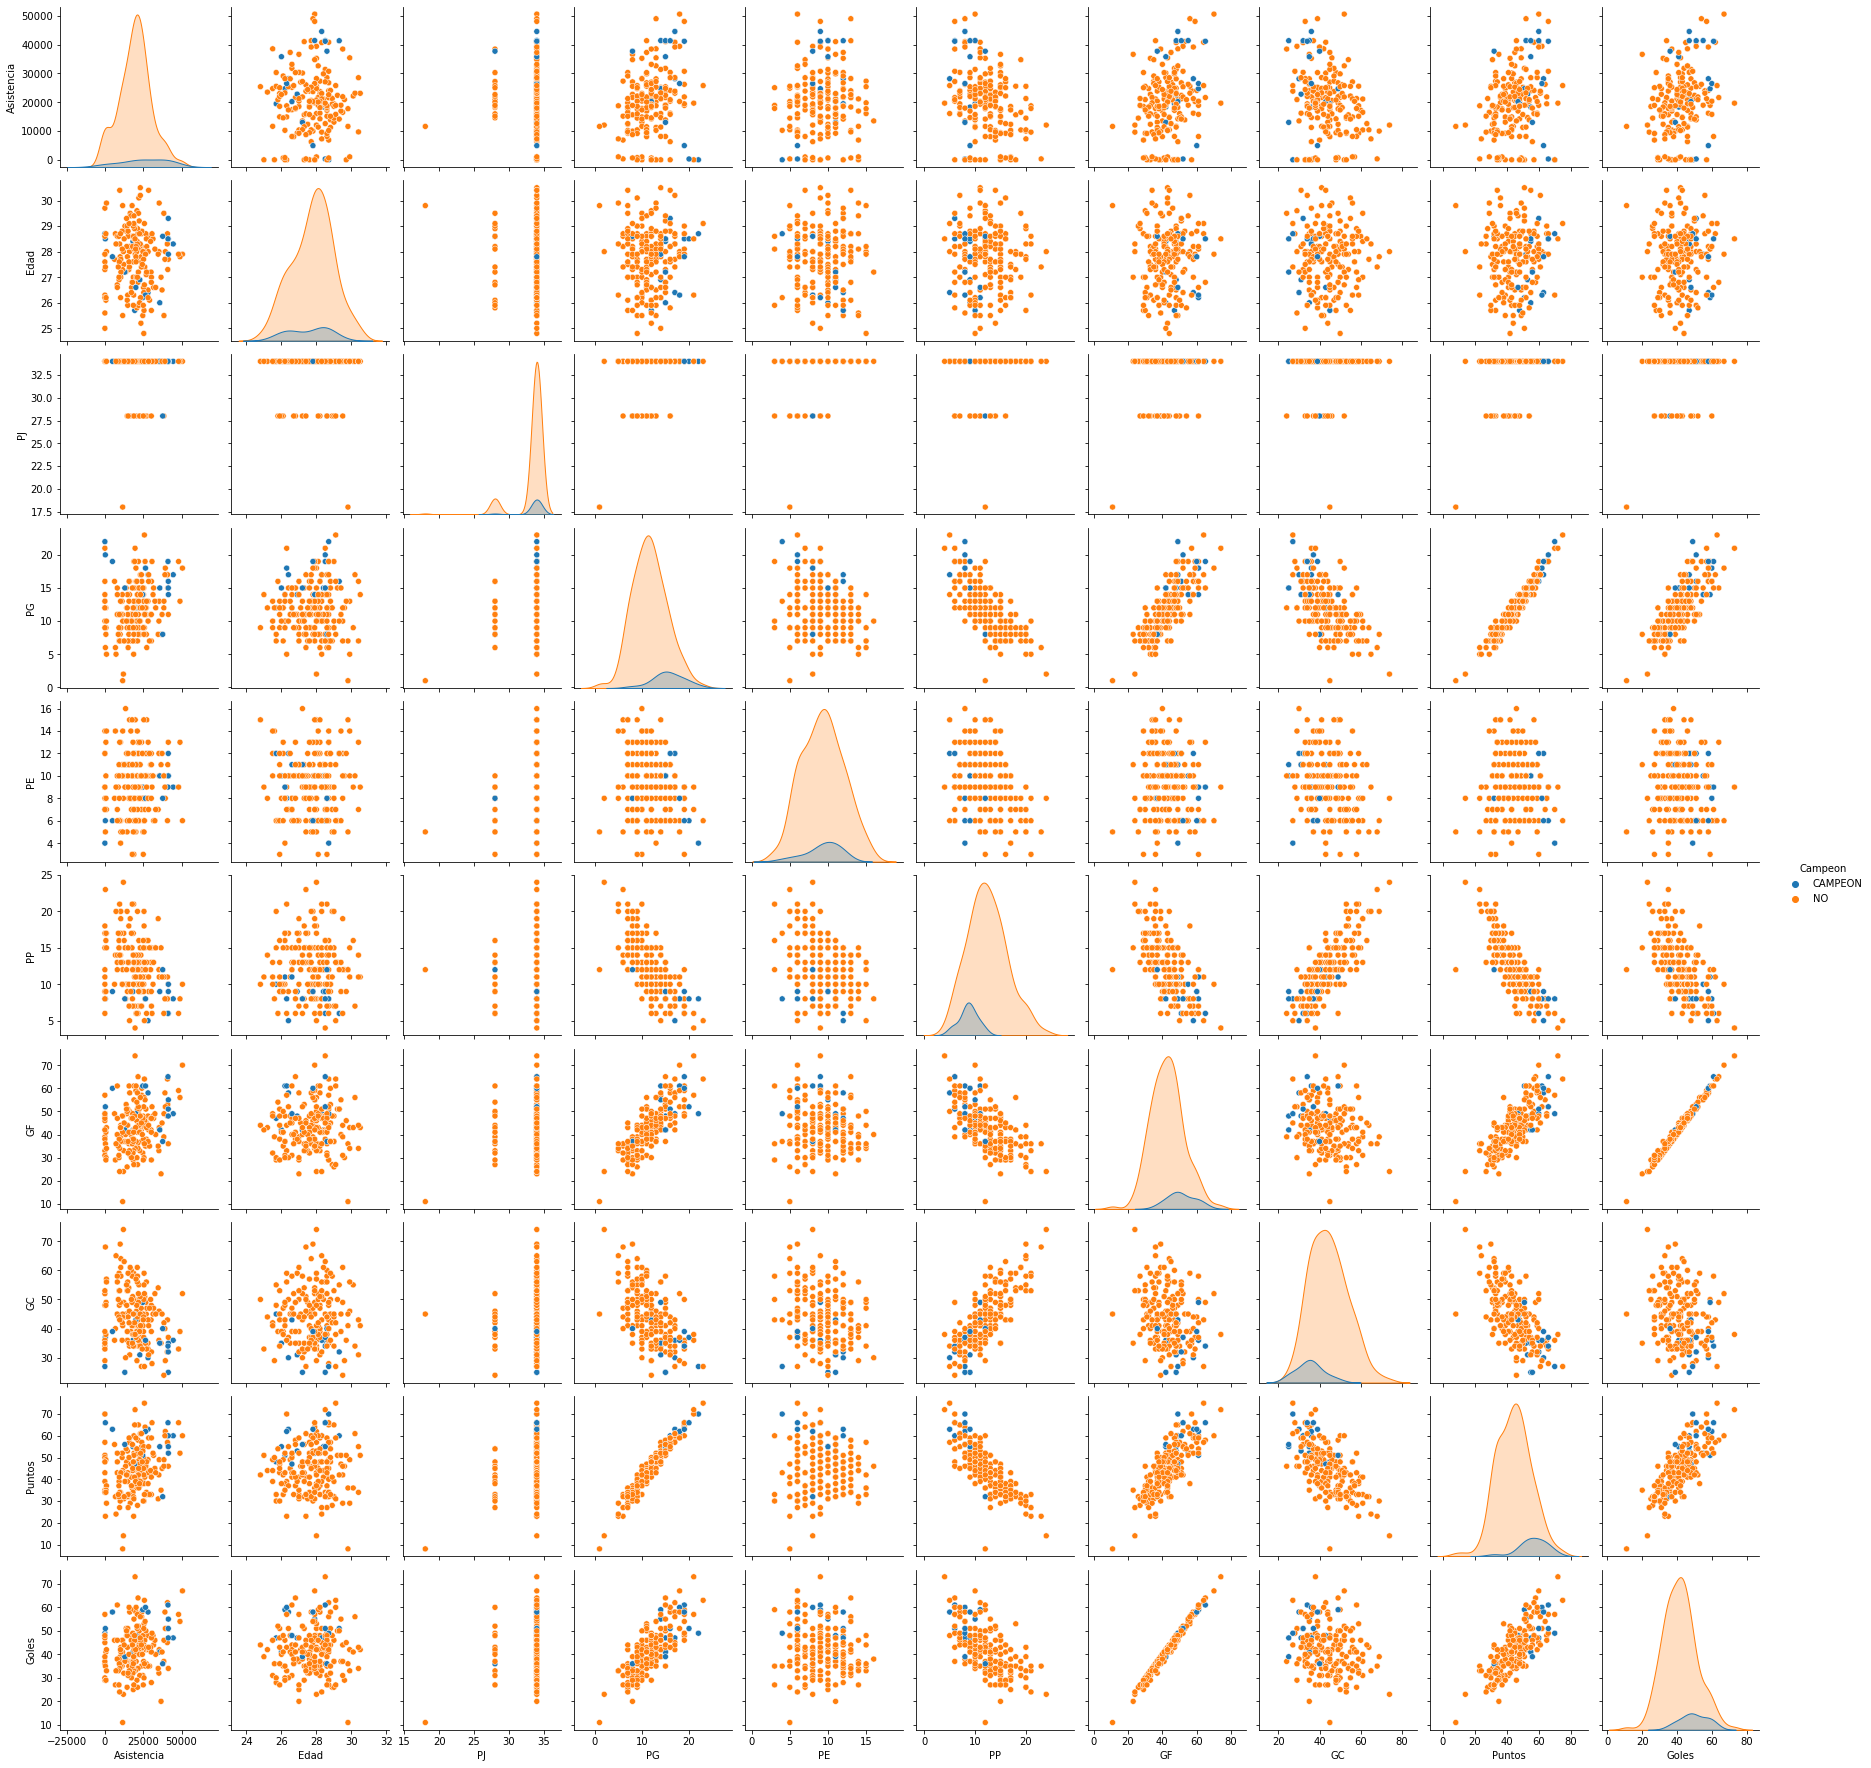

In [22]:
sns.pairplot(df_resume,hue="Campeon")
plt.show()

In [12]:
def show_corr_heatmap(df, title):
    
    corr = df.corr()
    mask = np.zeros_like(corr)
    mask[np.triu_indices_from(mask)] = True

    plt.figure(figsize = (12, 12))
    plt.title(title)
    sns.heatmap(corr, annot = True, linewidths=.5, fmt=".2f", square=True, mask = mask)
    plt.show()

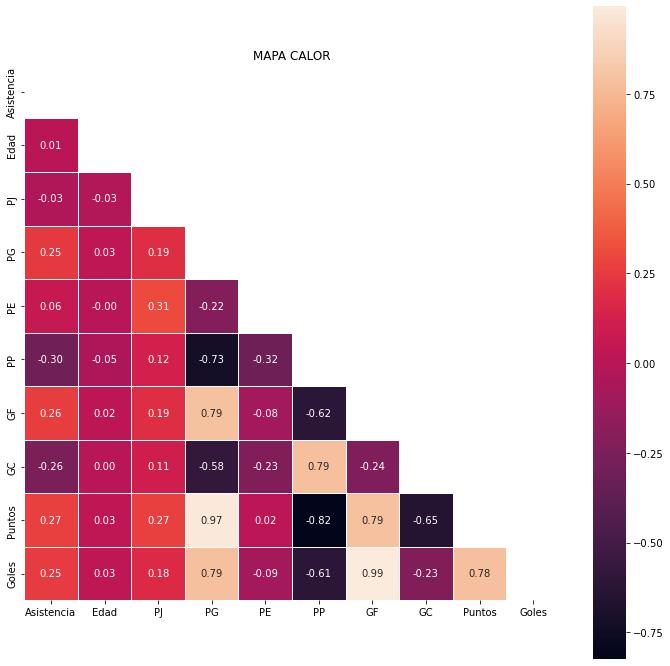

None

In [24]:
display(show_corr_heatmap(df_resume,"MAPA CALOR"))

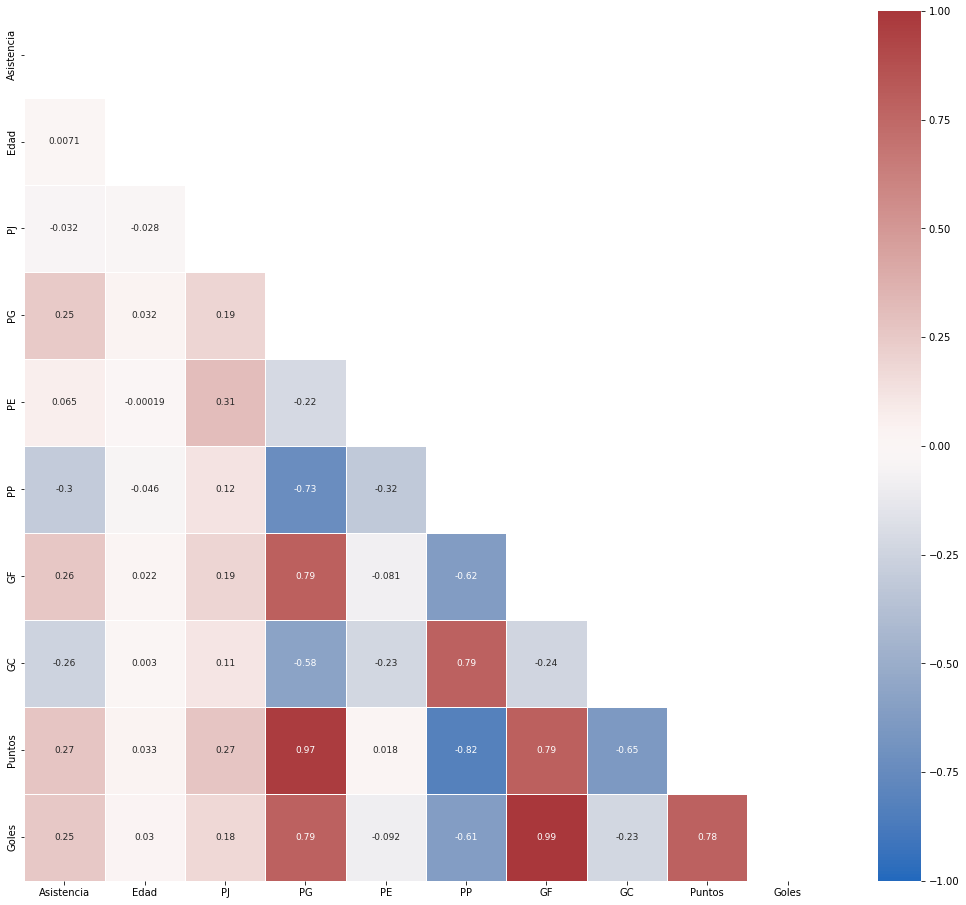

In [25]:
fig = plt.figure(figsize = (18,16))
mask = np.triu(np.ones_like(df_resume.corr(), dtype=bool))
ax = sns.heatmap(df_resume.corr(), mask = mask, vmin = -1, vmax = 1, annot = True, cmap = 'vlag', lw = 0.8, annot_kws = {"size": 9})

# Correlaciones Importantes
*   Experiencia Laboral y edad  .99
*   Crédito Personal y Ingresos .50
*   Crédito Personal y Gastos   .37
*   Cuenta de Ahorros y Crédito Personal .32
*   Cuenta de Ahorros y Activo Financiero .32
*   Tarjetas de crédito y cuenta de ahorros .28
*   Hipoteca y Ingresos .21
*   Crédito personal y Educación .14
*   Crédito personal y Hipoteca .14 

### Visualización de datos avanzada

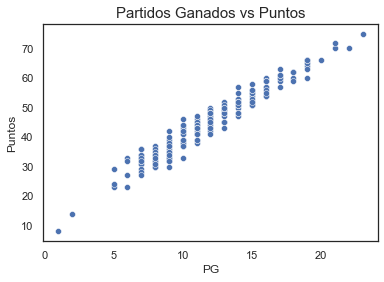

In [137]:
#relación entre Partidos ganados y puntos
scplt = sns.scatterplot(x=df['PG'], y=df['Puntos'])
scplt.set_title('Partidos Ganados vs Puntos', fontsize=15);

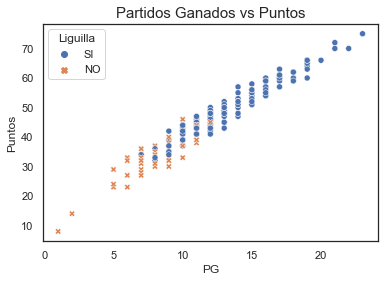

In [139]:
scplt = sns.scatterplot(x=df['PG'], y=df['Puntos'], hue=df['Liguilla'], style=df['Liguilla'])
scplt.set_title('Partidos Ganados vs Puntos', fontsize=15);

## Conclusiones

## Machine Learning

### Regresión Logística

In [141]:
#Metrics
from sklearn.metrics import make_scorer, accuracy_score,precision_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score ,precision_score,recall_score,f1_score

#Model Select
from sklearn.model_selection import KFold,train_test_split,cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import  LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import linear_model
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import cross_val_score

In [155]:
X=df_resume.drop(columns=['Temporada','Nombre','Posicion','Campeon','Liguilla'])
y=df_resume['Puntos']

In [156]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

In [157]:
#Train and Test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [158]:
logreg = LogisticRegression(solver= 'lbfgs',max_iter=400)
logreg.fit(X_train, y_train)
Y_pred = logreg.predict(X_test)
accuracy_lr=round(accuracy_score(y_test,Y_pred)* 100, 2)
acc_log = round(logreg.score(X_train, y_train) * 100, 2)


cm = confusion_matrix(y_test, Y_pred,)
accuracy = accuracy_score(y_test,Y_pred)
precision =precision_score(y_test, Y_pred,average='micro')
recall =  recall_score(y_test, Y_pred,average='micro')
f1 = f1_score(y_test,Y_pred,average='micro')
print('Confusion matrix for Logistic Regression\n',cm)
print('accuracy_Logistic Regression : %.3f' %accuracy)
print('precision_Logistic Regression : %.3f' %precision)
print('recall_Logistic Regression: %.3f' %recall)
print('f1-score_Logistic Regression : %.3f' %f1)

Confusion matrix for Logistic Regression
 [[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
accuracy_Logistic Regression : 0.050
precision_Logistic Regression : 0.050
recall_Logistic Regression: 0.050
f1-score_Logistic Regression : 0.050


C:\Users\HP\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
